___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (streamlit api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
df = data.copy()

### Exploratory Data Analysis

In [4]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.shape

(284807, 31)

In [7]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
df.Time.sort_values()

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284805    172788.0
284804    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [10]:
df[df['Class']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Time,492.0,80746.806911,47835.365138,406.000000,41241.500000,75568.500000,128483.000000,170348.000000
V1,492.0,-4.771948,6.783687,-30.552380,-6.036063,-2.342497,-0.419200,2.132386
V2,492.0,3.623778,4.291216,-8.402154,1.188226,2.717869,4.971257,22.057729
V3,492.0,-7.033281,7.110937,-31.103685,-8.643489,-5.075257,-2.276185,2.250210
V4,492.0,4.542029,2.873318,-1.313275,2.373050,4.177147,6.348729,12.114672
V5,492.0,-3.151225,5.372468,-22.105532,-4.792835,-1.522962,0.214562,11.095089
V6,492.0,-1.397737,1.858124,-6.406267,-2.501511,-1.424616,-0.413216,6.474115
V7,492.0,-5.568731,7.206773,-43.557242,-7.965295,-3.034402,-0.945954,5.802537
V8,492.0,0.570636,6.797831,-41.044261,-0.195336,0.621508,1.764879,20.007208
V9,492.0,-2.581123,2.500896,-13.434066,-3.872383,-2.208768,-0.787850,3.353525


In [11]:
df[df['Class']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284315.0,94838.202258,47484.015786,0.000000,54230.000000,84711.000000,139333.000000,172792.000000
V1,284315.0,0.008258,1.929814,-56.407510,-0.917544,0.020023,1.316218,2.454930
V2,284315.0,-0.006271,1.636146,-72.715728,-0.599473,0.064070,0.800446,18.902453
V3,284315.0,0.012171,1.459429,-48.325589,-0.884541,0.182158,1.028372,9.382558
V4,284315.0,-0.007860,1.399333,-5.683171,-0.850077,-0.022405,0.737624,16.875344
V5,284315.0,0.005453,1.356952,-113.743307,-0.689398,-0.053457,0.612181,34.801666
V6,284315.0,0.002419,1.329913,-26.160506,-0.766847,-0.273123,0.399619,73.301626
V7,284315.0,0.009637,1.178812,-31.764946,-0.551442,0.041138,0.571019,120.589494
V8,284315.0,-0.000987,1.161283,-73.216718,-0.208633,0.022041,0.326200,18.709255
V9,284315.0,0.004467,1.089372,-6.290730,-0.640412,-0.049964,0.598230,15.594995


### Data Cleaning
Check Missing Values and Outliers

In [12]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
#sns.pairplot(df)

<AxesSubplot:>

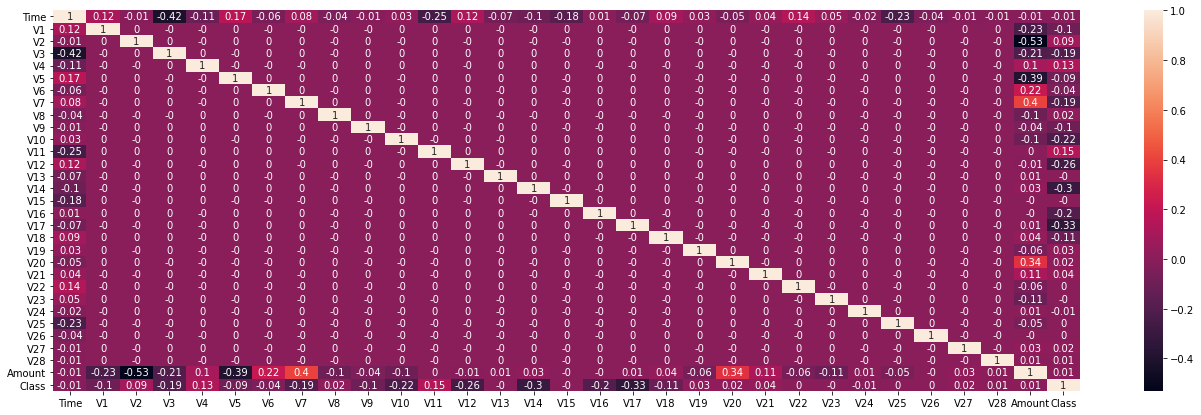

In [14]:
plt.figure(figsize = (23, 7))
sns.heatmap(df.corr().round(2), annot = True)    #  Because of the  null corr between V1-V28, we can say that these ara PCA components

## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [15]:
X = df.drop(columns = ['Class','Time'], axis = 1)
y = df['Class']

In [16]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

#### Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaled_X_Amount = scaler.fit_transform(X_train[['Amount']])

In [22]:
scaled_X_Amount

array([[-0.32249376],
       [-0.33976388],
       [ 0.34669349],
       ...,
       [-0.17053266],
       [-0.34813969],
       [-0.32380996]])

In [23]:
scaled_X_Amount_total = scaler.transform(X[['Amount']])

In [24]:
X['Amount'] = scaled_X_Amount_total

In [25]:
X_train['Amount'] = scaled_X_Amount

In [26]:
scaled_X_Amount_test = scaler.transform(X_test[['Amount']])

In [27]:
X_test['Amount'] = scaled_X_Amount_test

## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [28]:
from sklearn.linear_model import LogisticRegression

***ii. Model Training***

In [29]:
log_model = LogisticRegression()  

In [30]:
log_model.fit(X_train, y_train)

LogisticRegression()

***iii. Prediction and Model Evaluating***

In [31]:
y_pred = log_model.predict(X_test)

In [32]:
y_pred_proba = log_model.predict_proba(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [35]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[56851    13]
 [   34    64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227419     32]
 [   141    253]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.89      0.64      0.75       394

    accuracy                           1.00    227845
   macro avg       0.94      0.82      0.87    227845
weighted avg       1.00      1.00      1.00    227845




You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [36]:
from sklearn.pipeline import make_pipeline
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [128]:
sklearn.__version__

'1.0.2'

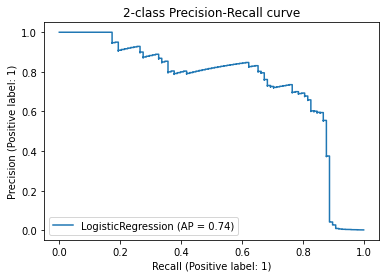

In [37]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="LogisticRegression"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

### 2'nd Way to find Precision-Recall curve

In [38]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve

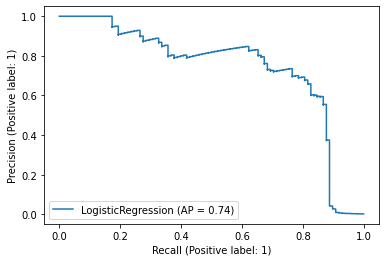

In [39]:
plot_precision_recall_curve(log_model, X_test, y_test);

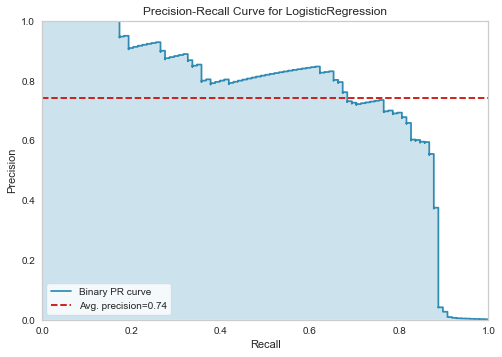

In [40]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(log_model)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

#### Best Treshhold

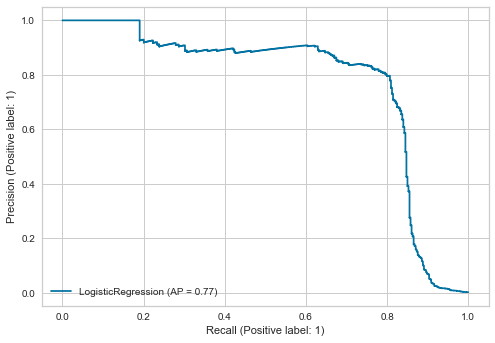

In [41]:
plot_precision_recall_curve(log_model, X_train, y_train);

In [42]:
y_pred_proba = log_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

0.7740078710751039

In [43]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [44]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  # f1 skorun max oldugu yeri verecek
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.07417038914002204

In [45]:
log_model.predict_proba(X_test)         # 0.999475 + 0.000525 = 1 (Toplam olasilik)

array([[9.99959803e-01, 4.01965325e-05],
       [9.99960295e-01, 3.97045189e-05],
       [9.99999244e-01, 7.55727220e-07],
       ...,
       [9.99980700e-01, 1.92997155e-05],
       [9.99962794e-01, 3.72061085e-05],
       [9.99855233e-01, 1.44767488e-04]])

In [46]:
class_1_proba = log_model.predict_proba(X_test)[:,1]      
class_1_proba  

array([4.01965325e-05, 3.97045189e-05, 7.55727220e-07, ...,
       1.92997155e-05, 3.72061085e-05, 1.44767488e-04])

In [47]:
y_pred2 = pd.Series(class_1_proba).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [48]:
print(confusion_matrix(y_test,y_pred2))           # %7 treshhold degerine göre test datasi icin yeni hesaplama
print(classification_report(y_test,y_pred2))

[[56826    38]
 [   19    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.81      0.73        98

    accuracy                           1.00     56962
   macro avg       0.84      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [49]:
class_1_proba_train = log_model.predict_proba(X_train)[:,1]    # train setinde yeni treshhold'a göre hesaplandi

y_train_pred2 = pd.Series(class_1_proba_train).apply(lambda x : 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[227370     81]
 [    76    318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.80      0.81      0.80       394

    accuracy                           1.00    227845
   macro avg       0.90      0.90      0.90    227845
weighted avg       1.00      1.00      1.00    227845



***v. Apply and Plot StratifiedKFold***

In [50]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
target = df['Class']


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

model_kfold = LogisticRegression()

def train_model(train, test, fold_no):
    model_kfold.fit(X_train,y_train)
    predictions = model_kfold.predict(X_test)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(y_test,predictions))
    print('Fold',str(fold_no),'Precision:',precision_score(y_test,predictions))
    print('Fold',str(fold_no),'Recall:', recall_score(y_test,predictions))
fold_no = 1

for train_index, test_index in skf.split(df, target):
    train = df.loc[train_index,:]
    test = df.loc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1

Fold 1 Accuracy: 0.9991748885221726
Fold 1 Precision: 0.8311688311688312
Fold 1 Recall: 0.6530612244897959
Fold 2 Accuracy: 0.9991748885221726
Fold 2 Precision: 0.8311688311688312
Fold 2 Recall: 0.6530612244897959
Fold 3 Accuracy: 0.9991748885221726
Fold 3 Precision: 0.8311688311688312
Fold 3 Recall: 0.6530612244897959
Fold 4 Accuracy: 0.9991748885221726
Fold 4 Precision: 0.8311688311688312
Fold 4 Recall: 0.6530612244897959
Fold 5 Accuracy: 0.9991748885221726
Fold 5 Precision: 0.8311688311688312
Fold 5 Recall: 0.6530612244897959


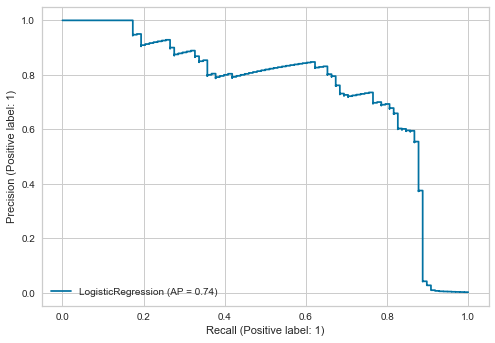

In [51]:
plot_precision_recall_curve(model_kfold, X_test, y_test);

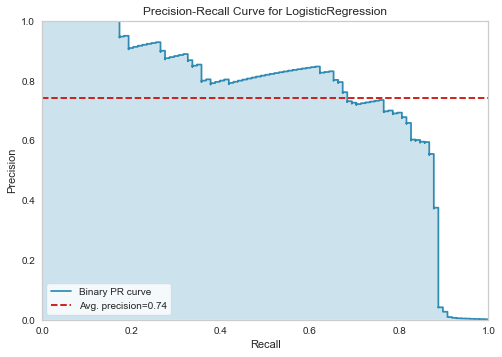

In [52]:
viz = PrecisionRecallCurve(model_kfold)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [53]:
#pip install scikit-learn==1.0.2

In [54]:
#!pip install imblearn

In [55]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline 

In [56]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [57]:
over = SMOTE()

In [58]:
X_over, y_over = over.fit_resample(X, y)

In [59]:
X_over.shape

(568630, 29)

In [60]:
y_over.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [61]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train, y_train)

In [62]:
y_under.value_counts()

0    394
1    394
Name: Class, dtype: int64

In [63]:
over = SMOTE(sampling_strategy={1: 500})                      
under = RandomUnderSampler(sampling_strategy={0: 200000})
# ortalama uygun noktada bulusturduk, yeni min classs degeri <= 1.5 * min class gözlem sayisi

In [64]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [65]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [66]:
steps = [('o', over), ('u', under)]
pipeline = imbpipeline(steps=steps)

In [67]:
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [68]:
X_resampled.shape

(200500, 29)

In [69]:
y_resampled.shape

(200500,)

In [70]:
y_resampled.value_counts()

0    200000
1       500
Name: Class, dtype: int64

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

***ii. Model Training***

In [71]:
operations = [('o', over), ('u', under), 
              ("log", LogisticRegression(random_state=42))]

In [72]:
smote_pipeline = imbpipeline(steps=operations)

In [73]:
smote_pipeline.fit(X_resampled, y_resampled)

Pipeline(steps=[('o', SMOTE(sampling_strategy={1: 500})),
                ('u', RandomUnderSampler(sampling_strategy={0: 200000})),
                ('log', LogisticRegression(random_state=42))])

***iii. Prediction and Model Evaluating***

In [74]:
y_pred = smote_pipeline.predict(X_test)

In [75]:
y_pred_proba = smote_pipeline.predict_proba(X_test)

In [76]:
eval_metric(smote_pipeline, X_resampled, y_resampled, X_test, y_test)

Test_Set
[[56848    16]
 [   28    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.71      0.76        98

    accuracy                           1.00     56962
   macro avg       0.91      0.86      0.88     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[199967     33]
 [   144    356]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200000
           1       0.92      0.71      0.80       500

    accuracy                           1.00    200500
   macro avg       0.96      0.86      0.90    200500
weighted avg       1.00      1.00      1.00    200500



***iv.  Plot Precision and Recall Curve***


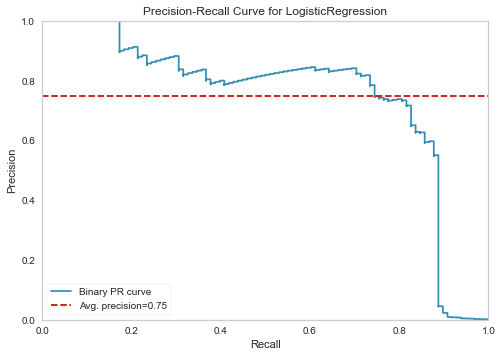

In [77]:
from yellowbrick.classifier import PrecisionRecallCurve

model = LogisticRegression(random_state=42)


viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_resampled,  y_resampled)
viz.score(X_test, y_test)
viz.show();

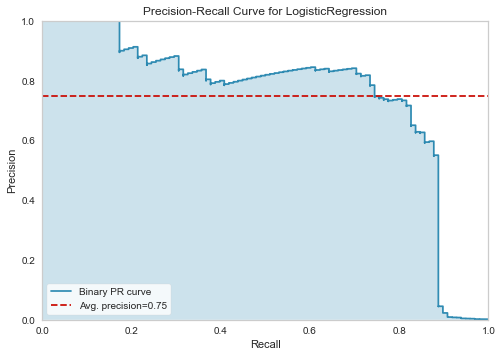

In [78]:
viz = PrecisionRecallCurve(smote_pipeline)

viz.fit(X_resampled, y_resampled)
viz.score(X_test, y_test)
viz.show();

***v. Apply and Plot StratifiedKFold***

In [79]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
target = df['Class']


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

model_smote_kfold = LogisticRegression()

def train_model(train, test, fold_no):
    model_smote_kfold.fit(X_resampled, y_resampled)
    predictions = model_smote_kfold.predict(X_test)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(y_test,predictions))
    print('Fold',str(fold_no),'Precision:',precision_score(y_test,predictions))
    print('Fold',str(fold_no),'Recall:', recall_score(y_test,predictions))
fold_no = 1

for train_index, test_index in skf.split(df, target):
    train = df.loc[train_index,:]
    test = df.loc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1

Fold 1 Accuracy: 0.9992275552122467
Fold 1 Precision: 0.813953488372093
Fold 1 Recall: 0.7142857142857143
Fold 2 Accuracy: 0.9992275552122467
Fold 2 Precision: 0.813953488372093
Fold 2 Recall: 0.7142857142857143
Fold 3 Accuracy: 0.9992275552122467
Fold 3 Precision: 0.813953488372093
Fold 3 Recall: 0.7142857142857143
Fold 4 Accuracy: 0.9992275552122467
Fold 4 Precision: 0.813953488372093
Fold 4 Recall: 0.7142857142857143
Fold 5 Accuracy: 0.9992275552122467
Fold 5 Precision: 0.813953488372093
Fold 5 Recall: 0.7142857142857143


### Random Forest Classifier with balanced data

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42, max_depth = 5)

In [82]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [83]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[56642   222]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.28      0.88      0.42        98

    accuracy                           1.00     56962
   macro avg       0.64      0.94      0.71     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[226664    787]
 [    36    358]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.31      0.91      0.47       394

    accuracy                           1.00    227845
   macro avg       0.66      0.95      0.73    227845
weighted avg       1.00      1.00      1.00    227845



In [84]:
from sklearn.model_selection import cross_val_score, cross_validate
model = RandomForestClassifier(random_state=42, max_depth = 5)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.999425
test_precision    0.930899
test_recall       0.722949
test_f1           0.811500
dtype: float64

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [85]:
rf_smote_model = RandomForestClassifier(random_state=42, max_depth = 5)

In [86]:
X_resampled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.032543,0.063001,1.192566,-1.204726,-0.639334,0.297201,-0.218226,0.333627,-0.893387,0.346153,...,-0.667709,-0.080184,0.391849,0.055855,0.728176,-0.146694,-0.240989,-0.287961,-0.205939,-0.134596
1,-0.027836,0.745978,0.346658,-0.665392,0.410888,-0.895010,0.840541,-0.031266,-0.223334,-0.220622,...,-0.061091,-0.207302,-0.488795,0.077170,0.055646,-0.549698,0.116972,0.239343,0.087585,-0.348140
2,1.181842,-0.220696,0.650137,-0.166884,-0.770594,-0.379380,-0.480922,0.187963,0.333115,-0.046573,...,-0.183567,-0.057635,-0.225252,0.156492,0.247896,-0.060545,0.908772,-0.067108,-0.005120,-0.342795
3,-1.448861,0.346419,1.750288,0.669983,1.024061,-0.747054,0.274014,-0.204883,-0.338558,0.119430,...,0.193262,-0.309680,-0.578023,-0.134794,0.060708,-0.036545,0.274662,-0.117998,0.074349,-0.333781
4,0.216305,-0.147359,0.524445,-1.202091,-0.204164,-0.048985,0.027586,0.145499,-1.024449,0.408935,...,-0.541511,-0.231904,-0.269729,0.145105,0.712575,-0.559089,0.136597,0.008634,0.002725,-0.228047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200495,0.147657,0.800611,0.734002,1.555916,0.487459,0.172336,0.251493,0.186049,-0.728232,-0.069385,...,-0.091929,-0.021976,-0.007867,-0.082751,-0.257463,0.293969,-0.172922,-0.035063,0.010502,-0.346866
200496,-4.698841,2.717065,-4.549450,5.498154,-1.598707,-1.548091,-4.129569,0.577916,-1.485800,-4.564777,...,-0.162199,0.578999,-0.057988,0.338948,-0.245351,0.271441,0.027913,-1.496768,0.614534,-0.343670
200497,-4.840211,3.537023,-5.849128,4.115543,-3.986197,-1.854858,-5.290448,2.361291,-2.924071,-6.294574,...,0.369131,1.109591,0.109789,-0.295876,0.044510,0.309567,-0.176214,0.271022,0.632077,0.104325
200498,1.962977,0.185594,-2.564887,0.431938,0.866459,-1.063320,0.609950,-0.391321,0.550820,-0.993676,...,0.015661,-0.066851,-0.057847,-0.042657,0.415100,0.348416,-0.156662,-0.022057,-0.005473,-0.078937


In [87]:
rf_smote_model.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=5, random_state=42)

***ii. Prediction and Model Evaluating***

In [88]:
eval_metric(rf_smote_model, X_resampled, y_resampled, X_test, y_test)

Test_Set
[[56856     8]
 [   23    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.77      0.83        98

    accuracy                           1.00     56962
   macro avg       0.95      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[199987     13]
 [   115    385]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200000
           1       0.97      0.77      0.86       500

    accuracy                           1.00    200500
   macro avg       0.98      0.88      0.93    200500
weighted avg       1.00      1.00      1.00    200500



***iii. Plot Precision and Recall Curve***


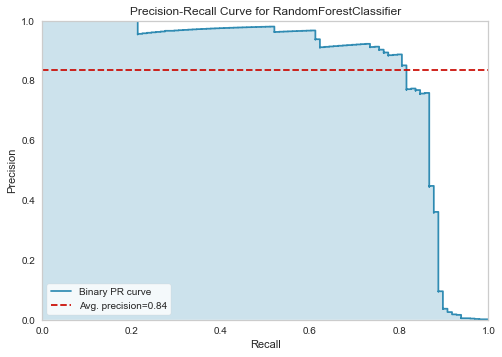

In [89]:
viz = PrecisionRecallCurve(rf_smote_model)

viz.fit(X_resampled, y_resampled)
viz.score(X_test, y_test)
viz.show();

#### GridSearch RF

In [90]:
param_grid = {'n_estimators':[100,120],
             'max_depth':[2,3,4,6,7]}

In [91]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(random_state=42)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             scoring='recall',
                             n_jobs=-1)

In [99]:
rf_grid_model.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 6, 7],
                         'n_estimators': [100, 120]},
             scoring='recall', verbose=3)

In [100]:
rf_grid_model.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [101]:
rf_grid_model.best_score_

0.772

In [102]:
eval_metric(rf_grid_model, X_resampled, y_resampled, X_test, y_test)

Test_Set
[[56858     6]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[199995      5]
 [    92    408]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200000
           1       0.99      0.82      0.89       500

    accuracy                           1.00    200500
   macro avg       0.99      0.91      0.95    200500
weighted avg       1.00      1.00      1.00    200500



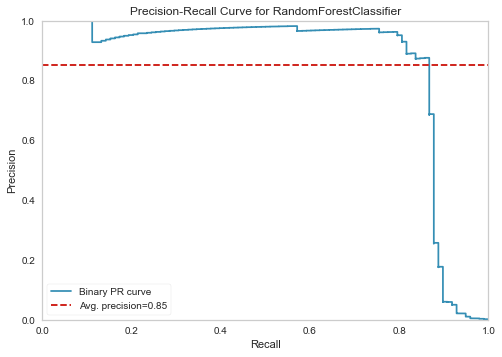

In [103]:
model = RandomForestClassifier(random_state=42, max_depth=7, n_estimators = 100)

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_resampled, y_resampled)
viz.score(X_test, y_test)
viz.show();

In [106]:
pip install optuna

     -------------------------------------- 308.2/308.2 KB 4.8 MB/s eta 0:00:00
     ------------------------------------- 209.3/209.3 KB 13.3 MB/s eta 0:00:00
     ---------------------------------------- 81.0/81.0 KB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 78.6/78.6 KB ? eta 0:00:00
     ---------------------------------------- 147.0/147.0 KB ? eta 0:00:00
     ---------------------------------------- 49.7/49.7 KB ? eta 0:00:00
     ---------------------------------------- 112.3/112.3 KB ? eta 0:00:00
     ---------------------------------------- 95.2/95.2 KB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11107 sha256=5ee4cb146ab6961924db22609b00e33772bc2341adca078df30c7a430200ab3e
  Stored in directory: c:\users\metea\appdata\local\pip\cache\wheels\7f\1a\65\84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba61

You should consider upgrading via the 'C:\Users\metea\anaconda3\python.exe -m pip install --upgrade pip' command.


In [107]:
import optuna
import sklearn
def objective(trial):
      n_estimators = trial.suggest_int('n_estimators', 20, 120)
      max_depth = int(trial.suggest_loguniform('max_depth', 1, 9))
      clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
      clf.fit(X_train, y_train)
      pred = clf.predict(X_test)
      recall = recall_score(pred, y_test)
      return recall

In [108]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

[I 2022-07-08 09:48:44,982] A new study created in memory with name: no-name-31435beb-8d44-432c-9a10-3060e76f5d70
[I 2022-07-08 09:49:09,703] Trial 0 finished with value: 0.9506172839506173 and parameters: {'n_estimators': 29, 'max_depth': 7.348672417647679}. Best is trial 0 with value: 0.9506172839506173.
[I 2022-07-08 09:49:42,132] Trial 1 finished with value: 0.8076923076923077 and parameters: {'n_estimators': 83, 'max_depth': 3.5446404163721663}. Best is trial 0 with value: 0.9506172839506173.
[I 2022-07-08 09:49:52,951] Trial 2 finished with value: 0.7692307692307693 and parameters: {'n_estimators': 71, 'max_depth': 1.205980509309457}. Best is trial 0 with value: 0.9506172839506173.
[I 2022-07-08 09:50:14,209] Trial 3 finished with value: 0.8059701492537313 and parameters: {'n_estimators': 81, 'max_depth': 2.3892524530291324}. Best is trial 0 with value: 0.9506172839506173.
[I 2022-07-08 09:51:30,610] Trial 4 finished with value: 0.9512195121951219 and parameters: {'n_estimators':

In [109]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 5
Best trial: {'n_estimators': 78, 'max_depth': 8.755051404951807}


In [110]:
trial = study.best_trial
print('Recall: {}'.format(trial.value))

Recall: 0.9512195121951219


***iv. Apply and Plot StratifiedKFold***

In [111]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
target = df['Class']


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

model_smote_rf_kfold = RandomForestClassifier(random_state=42)

def train_model(train, test, fold_no):
    model_smote_rf_kfold.fit(X_resampled, y_resampled)
    predictions = model_smote_rf_kfold.predict(X_test)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(y_test,predictions))
    print('Fold',str(fold_no),'Precision:',precision_score(y_test,predictions))
    print('Fold',str(fold_no),'Recall:', recall_score(y_test,predictions))
fold_no = 1

for train_index, test_index in skf.split(df, target):
    train = df.loc[train_index,:]
    test = df.loc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1

Fold 1 Accuracy: 0.9995962220427653
Fold 1 Precision: 0.9411764705882353
Fold 1 Recall: 0.8163265306122449
Fold 2 Accuracy: 0.9995962220427653
Fold 2 Precision: 0.9411764705882353
Fold 2 Recall: 0.8163265306122449
Fold 3 Accuracy: 0.9995962220427653
Fold 3 Precision: 0.9411764705882353
Fold 3 Recall: 0.8163265306122449
Fold 4 Accuracy: 0.9995962220427653
Fold 4 Precision: 0.9411764705882353
Fold 4 Recall: 0.8163265306122449
Fold 5 Accuracy: 0.9995962220427653
Fold 5 Precision: 0.9411764705882353
Fold 5 Recall: 0.8163265306122449


### LightGBM

In [113]:
pip install lightgbm

  Using cached lightgbm-3.3.2-py3-none-win_amd64.whl (1.0 MB)


You should consider upgrading via the 'C:\Users\metea\anaconda3\python.exe -m pip install --upgrade pip' command.


In [114]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_resampled, y_resampled)

LGBMClassifier()

In [115]:
eval_metric(clf, X_resampled, y_resampled, X_test, y_test)

Test_Set
[[56510   354]
 [   38    60]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.61      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.80      0.62     56962
weighted avg       1.00      0.99      1.00     56962


Train_Set
[[199015    985]
 [   160    340]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200000
           1       0.26      0.68      0.37       500

    accuracy                           0.99    200500
   macro avg       0.63      0.84      0.68    200500
weighted avg       1.00      0.99      1.00    200500



In [116]:
def objective(trial):
    dtrain = lgb.Dataset(X_resampled, y_resampled)
 
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
 
    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(X_resampled)
    pred_labels = np.rint(preds)
    recall = sklearn.metrics.recall_score(y_resampled, pred_labels)
    return recall
 
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-07-08 10:07:04,594] A new study created in memory with name: no-name-7645d154-d0b0-40f2-ab5f-5b6ebad19a1c


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:06,038] Trial 0 finished with value: 0.844 and parameters: {'lambda_l1': 8.353750934962672, 'lambda_l2': 0.010408277069681952, 'num_leaves': 118, 'feature_fraction': 0.767036904603702, 'bagging_fraction': 0.9439174471633414, 'bagging_freq': 5, 'min_child_samples': 63}. Best is trial 0 with value: 0.844.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:08,838] Trial 1 finished with value: 0.506 and parameters: {'lambda_l1': 0.0008192584721432025, 'lambda_l2': 0.00014407639399001266, 'num_leaves': 179, 'feature_fraction': 0.9532491980718291, 'bagging_fraction': 0.416837285968088, 'bagging_freq': 4, 'min_child_samples': 26}. Best is trial 0 with value: 0.844.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:10,790] Trial 2 finished with value: 1.0 and parameters: {'lambda_l1': 2.8196271644095536e-05, 'lambda_l2': 0.021717736248841886, 'num_leaves': 140, 'feature_fraction': 0.4931229048304112, 'bagging_fraction': 0.7067565680004302, 'bagging_freq': 1, 'min_child_samples': 78}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:15,395] Trial 3 finished with value: 0.856 and parameters: {'lambda_l1': 6.502464780491157e-06, 'lambda_l2': 7.242447333277784e-05, 'num_leaves': 247, 'feature_fraction': 0.9728070077126656, 'bagging_fraction': 0.8600183802018613, 'bagging_freq': 5, 'min_child_samples': 47}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2022-07-08 10:07:20,126] Trial 4 finished with value: 0.726 and parameters: {'lambda_l1': 1.626343920835972e-07, 'lambda_l2': 2.320777163430771e-08, 'num_leaves': 202, 'feature_fraction': 0.9313072751248049, 'bagging_fraction': 0.9980422974431141, 'bagging_freq': 1, 'min_child_samples': 13}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2022-07-08 10:07:22,111] Trial 5 finished with value: 0.97 and parameters: {'lambda_l1': 4.933155163462106e-07, 'lambda_l2': 5.855448343427798, 'num_leaves': 56, 'feature_fraction': 0.9536257904127419, 'bagging_fraction': 0.8801370997387352, 'bagging_freq': 6, 'min_child_samples': 34}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:23,570] Trial 6 finished with value: 0.866 and parameters: {'lambda_l1': 8.969512490013743e-06, 'lambda_l2': 5.194633078339978, 'num_leaves': 84, 'feature_fraction': 0.4821887478801101, 'bagging_fraction': 0.41236731003674, 'bagging_freq': 1, 'min_child_samples': 81}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:25,723] Trial 7 finished with value: 1.0 and parameters: {'lambda_l1': 0.0014249350113327763, 'lambda_l2': 0.003030482827977407, 'num_leaves': 216, 'feature_fraction': 0.8603774313313546, 'bagging_fraction': 0.7785320726150076, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:27,289] Trial 8 finished with value: 0.998 and parameters: {'lambda_l1': 0.0001130586024516479, 'lambda_l2': 0.011870609683070554, 'num_leaves': 95, 'feature_fraction': 0.5853980112229139, 'bagging_fraction': 0.4453429714858986, 'bagging_freq': 4, 'min_child_samples': 44}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465


[I 2022-07-08 10:07:28,857] Trial 9 finished with value: 0.724 and parameters: {'lambda_l1': 0.00922237474476975, 'lambda_l2': 0.001761515694898675, 'num_leaves': 55, 'feature_fraction': 0.5351920353304687, 'bagging_fraction': 0.7243765443499748, 'bagging_freq': 4, 'min_child_samples': 12}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:31,061] Trial 10 finished with value: 1.0 and parameters: {'lambda_l1': 1.381411178359867e-08, 'lambda_l2': 5.342658691152328e-07, 'num_leaves': 156, 'feature_fraction': 0.4060613322094342, 'bagging_fraction': 0.5594751855940044, 'bagging_freq': 2, 'min_child_samples': 99}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:32,827] Trial 11 finished with value: 1.0 and parameters: {'lambda_l1': 0.051937230978868036, 'lambda_l2': 0.15496481669558307, 'num_leaves': 254, 'feature_fraction': 0.7437013931259355, 'bagging_fraction': 0.7069204401406549, 'bagging_freq': 2, 'min_child_samples': 69}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465


[I 2022-07-08 10:07:33,867] Trial 12 finished with value: 0.84 and parameters: {'lambda_l1': 0.11717077477311975, 'lambda_l2': 1.145333963381258e-05, 'num_leaves': 10, 'feature_fraction': 0.6401068810084054, 'bagging_fraction': 0.7851909810069734, 'bagging_freq': 2, 'min_child_samples': 89}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:35,564] Trial 13 finished with value: 1.0 and parameters: {'lambda_l1': 0.00023530308221632153, 'lambda_l2': 0.14836336952437343, 'num_leaves': 215, 'feature_fraction': 0.8378696696048741, 'bagging_fraction': 0.6126591302092761, 'bagging_freq': 3, 'min_child_samples': 65}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:37,263] Trial 14 finished with value: 0.998 and parameters: {'lambda_l1': 1.5735820937444587e-05, 'lambda_l2': 0.11908607679949842, 'num_leaves': 143, 'feature_fraction': 0.8435193688976034, 'bagging_fraction': 0.6109098196752408, 'bagging_freq': 7, 'min_child_samples': 79}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:40,465] Trial 15 finished with value: 0.932 and parameters: {'lambda_l1': 0.0028067764164013227, 'lambda_l2': 0.0027042820981589763, 'num_leaves': 179, 'feature_fraction': 0.6754166001409956, 'bagging_fraction': 0.8120889799019337, 'bagging_freq': 3, 'min_child_samples': 6}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:42,026] Trial 16 finished with value: 0.664 and parameters: {'lambda_l1': 3.1865745595077493, 'lambda_l2': 0.0005613175530307144, 'num_leaves': 220, 'feature_fraction': 0.8536497430859219, 'bagging_fraction': 0.7570695223036296, 'bagging_freq': 1, 'min_child_samples': 26}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:43,589] Trial 17 finished with value: 1.0 and parameters: {'lambda_l1': 7.874632585668687e-05, 'lambda_l2': 0.3125954732287341, 'num_leaves': 174, 'feature_fraction': 0.4049789933148335, 'bagging_fraction': 0.6208652708942914, 'bagging_freq': 3, 'min_child_samples': 63}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2022-07-08 10:07:45,469] Trial 18 finished with value: 0.992 and parameters: {'lambda_l1': 4.412377531239829e-07, 'lambda_l2': 0.8120725730251703, 'num_leaves': 114, 'feature_fraction': 0.42181394693846475, 'bagging_fraction': 0.5304695541578628, 'bagging_freq': 2, 'min_child_samples': 56}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:47,807] Trial 19 finished with value: 0.802 and parameters: {'lambda_l1': 0.2610300915835455, 'lambda_l2': 4.5375313406967515e-06, 'num_leaves': 231, 'feature_fraction': 0.5741692954651874, 'bagging_fraction': 0.6622270749697022, 'bagging_freq': 3, 'min_child_samples': 35}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:49,413] Trial 20 finished with value: 0.996 and parameters: {'lambda_l1': 3.5688321642041514e-05, 'lambda_l2': 0.03038596839288328, 'num_leaves': 161, 'feature_fraction': 0.4776025321629061, 'bagging_fraction': 0.49924305850044237, 'bagging_freq': 5, 'min_child_samples': 76}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:51,614] Trial 21 finished with value: 1.0 and parameters: {'lambda_l1': 1.3492846944811247e-08, 'lambda_l2': 7.348942387638903e-08, 'num_leaves': 147, 'feature_fraction': 0.40223045547608277, 'bagging_fraction': 0.574425263137338, 'bagging_freq': 2, 'min_child_samples': 98}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:54,105] Trial 22 finished with value: 1.0 and parameters: {'lambda_l1': 1.0910852798915987e-08, 'lambda_l2': 7.020718956643579e-07, 'num_leaves': 191, 'feature_fraction': 0.7770586347038466, 'bagging_fraction': 0.6302017853261173, 'bagging_freq': 3, 'min_child_samples': 100}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:55,916] Trial 23 finished with value: 1.0 and parameters: {'lambda_l1': 0.016075662603459297, 'lambda_l2': 0.3454432546136505, 'num_leaves': 253, 'feature_fraction': 0.7324667698251827, 'bagging_fraction': 0.6661021457757933, 'bagging_freq': 3, 'min_child_samples': 65}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:57,493] Trial 24 finished with value: 0.998 and parameters: {'lambda_l1': 0.258454647994631, 'lambda_l2': 2.7039926270351588e-08, 'num_leaves': 169, 'feature_fraction': 0.6388582432086812, 'bagging_fraction': 0.5678846644242398, 'bagging_freq': 2, 'min_child_samples': 90}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:07:59,499] Trial 25 finished with value: 1.0 and parameters: {'lambda_l1': 3.0877611729300207e-06, 'lambda_l2': 5.384221587911559e-07, 'num_leaves': 199, 'feature_fraction': 0.4674434788676412, 'bagging_fraction': 0.6547942550117575, 'bagging_freq': 1, 'min_child_samples': 73}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:01,706] Trial 26 finished with value: 1.0 and parameters: {'lambda_l1': 0.00033286607686059706, 'lambda_l2': 5.971255578151007e-06, 'num_leaves': 236, 'feature_fraction': 0.7955284640904912, 'bagging_fraction': 0.6684445526628426, 'bagging_freq': 1, 'min_child_samples': 70}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:03,261] Trial 27 finished with value: 0.958 and parameters: {'lambda_l1': 1.118499212715799, 'lambda_l2': 1.5404672839734384, 'num_leaves': 201, 'feature_fraction': 0.718341026791197, 'bagging_fraction': 0.6123674743064424, 'bagging_freq': 3, 'min_child_samples': 57}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:05,271] Trial 28 finished with value: 1.0 and parameters: {'lambda_l1': 0.0003621344424645416, 'lambda_l2': 7.621144275171081e-06, 'num_leaves': 235, 'feature_fraction': 0.8038464270460268, 'bagging_fraction': 0.6973502454348632, 'bagging_freq': 2, 'min_child_samples': 69}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:07,253] Trial 29 finished with value: 1.0 and parameters: {'lambda_l1': 0.0005340927694605248, 'lambda_l2': 2.4563130029445587e-05, 'num_leaves': 118, 'feature_fraction': 0.785339050285259, 'bagging_fraction': 0.7188555870855318, 'bagging_freq': 1, 'min_child_samples': 85}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:09,777] Trial 30 finished with value: 0.888 and parameters: {'lambda_l1': 0.005766427602640624, 'lambda_l2': 2.476237737361463e-05, 'num_leaves': 125, 'feature_fraction': 0.8867224330574265, 'bagging_fraction': 0.8573155004460116, 'bagging_freq': 1, 'min_child_samples': 87}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:11,836] Trial 31 finished with value: 1.0 and parameters: {'lambda_l1': 7.728524883733209e-05, 'lambda_l2': 8.365820613343185e-07, 'num_leaves': 146, 'feature_fraction': 0.450890140288895, 'bagging_fraction': 0.514971975499277, 'bagging_freq': 2, 'min_child_samples': 61}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:14,457] Trial 32 finished with value: 0.66 and parameters: {'lambda_l1': 0.0182851734979176, 'lambda_l2': 1.9214189922840366e-07, 'num_leaves': 185, 'feature_fraction': 0.679048079976749, 'bagging_fraction': 0.4955450777795993, 'bagging_freq': 4, 'min_child_samples': 60}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:17,239] Trial 33 finished with value: 0.86 and parameters: {'lambda_l1': 2.247879577960854e-06, 'lambda_l2': 0.00010638724584760346, 'num_leaves': 103, 'feature_fraction': 0.790522259753728, 'bagging_fraction': 0.728736863178383, 'bagging_freq': 1, 'min_child_samples': 73}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:20,556] Trial 34 finished with value: 0.156 and parameters: {'lambda_l1': 1.6115863270166988e-08, 'lambda_l2': 8.70002666921789e-08, 'num_leaves': 242, 'feature_fraction': 0.7446262824795603, 'bagging_fraction': 0.574151283553889, 'bagging_freq': 2, 'min_child_samples': 100}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:22,627] Trial 35 finished with value: 1.0 and parameters: {'lambda_l1': 6.124734095035182e-08, 'lambda_l2': 1.4965562409018466e-06, 'num_leaves': 187, 'feature_fraction': 0.5276359039116083, 'bagging_fraction': 0.6353597054351207, 'bagging_freq': 3, 'min_child_samples': 93}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:24,775] Trial 36 finished with value: 0.682 and parameters: {'lambda_l1': 0.00011315566536971025, 'lambda_l2': 5.122421497896688e-05, 'num_leaves': 131, 'feature_fraction': 0.4418871776186165, 'bagging_fraction': 0.5198695809353342, 'bagging_freq': 2, 'min_child_samples': 49}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:26,475] Trial 37 finished with value: 0.992 and parameters: {'lambda_l1': 6.531732762785537e-08, 'lambda_l2': 0.051590010589917884, 'num_leaves': 213, 'feature_fraction': 0.9133630903098815, 'bagging_fraction': 0.45596843397590264, 'bagging_freq': 4, 'min_child_samples': 97}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:28,471] Trial 38 finished with value: 1.0 and parameters: {'lambda_l1': 0.025721502117123405, 'lambda_l2': 0.15417627002299225, 'num_leaves': 255, 'feature_fraction': 0.9990925435197249, 'bagging_fraction': 0.6687484586791621, 'bagging_freq': 6, 'min_child_samples': 67}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:30,739] Trial 39 finished with value: 1.0 and parameters: {'lambda_l1': 2.881245850875791e-06, 'lambda_l2': 0.0007069465191574485, 'num_leaves': 253, 'feature_fraction': 0.9959644928234731, 'bagging_fraction': 0.6628553390196242, 'bagging_freq': 6, 'min_child_samples': 70}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:33,006] Trial 40 finished with value: 1.0 and parameters: {'lambda_l1': 2.198673553856581e-06, 'lambda_l2': 1.0897051096739815e-08, 'num_leaves': 229, 'feature_fraction': 0.5949306812606348, 'bagging_fraction': 0.6631082546422331, 'bagging_freq': 6, 'min_child_samples': 73}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:34,753] Trial 41 finished with value: 1.0 and parameters: {'lambda_l1': 0.0017097845156542224, 'lambda_l2': 0.6067910373073224, 'num_leaves': 223, 'feature_fraction': 0.8277191163301822, 'bagging_fraction': 0.6085127619082318, 'bagging_freq': 3, 'min_child_samples': 64}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:36,504] Trial 42 finished with value: 0.998 and parameters: {'lambda_l1': 0.0017255263392137235, 'lambda_l2': 0.7178836607393662, 'num_leaves': 200, 'feature_fraction': 0.7461942385255856, 'bagging_fraction': 0.6325121703655823, 'bagging_freq': 3, 'min_child_samples': 46}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:37,987] Trial 43 finished with value: 0.864 and parameters: {'lambda_l1': 7.641787610483248e-07, 'lambda_l2': 8.008741343450938, 'num_leaves': 207, 'feature_fraction': 0.40479509612621023, 'bagging_fraction': 0.5883335194256226, 'bagging_freq': 4, 'min_child_samples': 82}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:40,034] Trial 44 finished with value: 1.0 and parameters: {'lambda_l1': 5.516687985092257e-08, 'lambda_l2': 1.2229817779411053e-06, 'num_leaves': 145, 'feature_fraction': 0.46137008506354976, 'bagging_fraction': 0.5355480086208332, 'bagging_freq': 2, 'min_child_samples': 93}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:43,073] Trial 45 finished with value: 0.846 and parameters: {'lambda_l1': 1.2367152154806298e-06, 'lambda_l2': 0.0004195797751199877, 'num_leaves': 223, 'feature_fraction': 0.9788711772977379, 'bagging_fraction': 0.6915266971498769, 'bagging_freq': 6, 'min_child_samples': 51}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:44,943] Trial 46 finished with value: 1.0 and parameters: {'lambda_l1': 0.00039251717890816676, 'lambda_l2': 4.9936762283024635e-06, 'num_leaves': 68, 'feature_fraction': 0.8004700828845337, 'bagging_fraction': 0.7380643380109946, 'bagging_freq': 1, 'min_child_samples': 84}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:47,223] Trial 47 finished with value: 0.776 and parameters: {'lambda_l1': 1.390501280721465e-07, 'lambda_l2': 0.0011054053783915536, 'num_leaves': 248, 'feature_fraction': 0.5891233854419095, 'bagging_fraction': 0.4608797272563461, 'bagging_freq': 7, 'min_child_samples': 40}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465


[I 2022-07-08 10:08:49,011] Trial 48 finished with value: 1.0 and parameters: {'lambda_l1': 1.4431384125932137e-08, 'lambda_l2': 1.0951447396452542e-08, 'num_leaves': 60, 'feature_fraction': 0.7089817957860577, 'bagging_fraction': 0.7551715574197174, 'bagging_freq': 5, 'min_child_samples': 95}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465


[I 2022-07-08 10:08:50,016] Trial 49 finished with value: 0.85 and parameters: {'lambda_l1': 8.825622694257027e-06, 'lambda_l2': 1.0195938299737808e-07, 'num_leaves': 7, 'feature_fraction': 0.5086589170980659, 'bagging_fraction': 0.8217098782932786, 'bagging_freq': 5, 'min_child_samples': 76}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:52,079] Trial 50 finished with value: 1.0 and parameters: {'lambda_l1': 1.4062849646363842e-08, 'lambda_l2': 0.005948934833686019, 'num_leaves': 70, 'feature_fraction': 0.7166535013042753, 'bagging_fraction': 0.7664000454148586, 'bagging_freq': 4, 'min_child_samples': 95}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:54,471] Trial 51 finished with value: 0.85 and parameters: {'lambda_l1': 0.004147057117535014, 'lambda_l2': 3.670910930222608e-06, 'num_leaves': 237, 'feature_fraction': 0.7968726343715768, 'bagging_fraction': 0.6809133100699865, 'bagging_freq': 1, 'min_child_samples': 85}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:08:57,219] Trial 52 finished with value: 0.738 and parameters: {'lambda_l1': 2.544489580533099e-06, 'lambda_l2': 1.4169475113979041e-06, 'num_leaves': 191, 'feature_fraction': 0.5298727173049156, 'bagging_fraction': 0.648323349165722, 'bagging_freq': 6, 'min_child_samples': 60}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2022-07-08 10:09:00,477] Trial 53 finished with value: 0.94 and parameters: {'lambda_l1': 0.0010687192642022186, 'lambda_l2': 1.5957354742491963e-05, 'num_leaves': 107, 'feature_fraction': 0.941868917788407, 'bagging_fraction': 0.9531496611011041, 'bagging_freq': 1, 'min_child_samples': 55}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:02,570] Trial 54 finished with value: 1.0 and parameters: {'lambda_l1': 0.00042657840153650803, 'lambda_l2': 4.2792757133789184e-07, 'num_leaves': 234, 'feature_fraction': 0.7717566656473587, 'bagging_fraction': 0.7109450355461298, 'bagging_freq': 1, 'min_child_samples': 71}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:04,602] Trial 55 finished with value: 1.0 and parameters: {'lambda_l1': 0.000391549763850348, 'lambda_l2': 2.2661875636171188e-07, 'num_leaves': 238, 'feature_fraction': 0.8228915179714611, 'bagging_fraction': 0.7164356793639617, 'bagging_freq': 1, 'min_child_samples': 71}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:07,030] Trial 56 finished with value: 1.0 and parameters: {'lambda_l1': 0.00044983639101088936, 'lambda_l2': 3.120220192904409e-07, 'num_leaves': 239, 'feature_fraction': 0.817082304859264, 'bagging_fraction': 0.7036623792619997, 'bagging_freq': 1, 'min_child_samples': 80}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:09,846] Trial 57 finished with value: 1.0 and parameters: {'lambda_l1': 3.2064692714769765e-05, 'lambda_l2': 4.5239175210613025e-05, 'num_leaves': 245, 'feature_fraction': 0.8711770263132532, 'bagging_fraction': 0.7861014604371582, 'bagging_freq': 1, 'min_child_samples': 67}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465


[I 2022-07-08 10:09:11,494] Trial 58 finished with value: 0.934 and parameters: {'lambda_l1': 0.0001494334011155904, 'lambda_l2': 0.0001519474071472483, 'num_leaves': 22, 'feature_fraction': 0.896349213703372, 'bagging_fraction': 0.6928000372006687, 'bagging_freq': 1, 'min_child_samples': 78}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:14,101] Trial 59 finished with value: 1.0 and parameters: {'lambda_l1': 2.9047904216897973e-05, 'lambda_l2': 8.458663196507171e-06, 'num_leaves': 230, 'feature_fraction': 0.8759878779188202, 'bagging_fraction': 0.8053115521995518, 'bagging_freq': 1, 'min_child_samples': 75}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:16,715] Trial 60 finished with value: 0.79 and parameters: {'lambda_l1': 0.015756852210637242, 'lambda_l2': 2.859407276478563e-06, 'num_leaves': 92, 'feature_fraction': 0.6809275198931766, 'bagging_fraction': 0.7410151342934509, 'bagging_freq': 2, 'min_child_samples': 61}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016011 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465


[I 2022-07-08 10:09:18,502] Trial 61 finished with value: 1.0 and parameters: {'lambda_l1': 1.6476079286138388e-05, 'lambda_l2': 7.87691889586206e-06, 'num_leaves': 29, 'feature_fraction': 0.7544917672634492, 'bagging_fraction': 0.8132238341154533, 'bagging_freq': 1, 'min_child_samples': 86}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:21,367] Trial 62 finished with value: 1.0 and parameters: {'lambda_l1': 1.382539564849387e-07, 'lambda_l2': 6.426086755124112e-08, 'num_leaves': 167, 'feature_fraction': 0.7601233865360691, 'bagging_fraction': 0.5874325160788442, 'bagging_freq': 2, 'min_child_samples': 89}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2022-07-08 10:09:22,949] Trial 63 finished with value: 0.61 and parameters: {'lambda_l1': 1.4088079017562438e-05, 'lambda_l2': 1.3794242462603902e-06, 'num_leaves': 47, 'feature_fraction': 0.4441119110944706, 'bagging_fraction': 0.4017120237017055, 'bagging_freq': 2, 'min_child_samples': 92}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:25,939] Trial 64 finished with value: 0.818 and parameters: {'lambda_l1': 6.214956078691249e-05, 'lambda_l2': 4.465573396978624e-07, 'num_leaves': 209, 'feature_fraction': 0.6472322287791064, 'bagging_fraction': 0.7573991005312743, 'bagging_freq': 5, 'min_child_samples': 67}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2022-07-08 10:09:27,833] Trial 65 finished with value: 1.0 and parameters: {'lambda_l1': 0.00021476592853815468, 'lambda_l2': 1.9936169370512197e-05, 'num_leaves': 72, 'feature_fraction': 0.7862267518150897, 'bagging_fraction': 0.8396385893239727, 'bagging_freq': 1, 'min_child_samples': 80}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:30,640] Trial 66 finished with value: 0.712 and parameters: {'lambda_l1': 0.05254080373886254, 'lambda_l2': 1.9857413134968618e-05, 'num_leaves': 134, 'feature_fraction': 0.7773165007227748, 'bagging_fraction': 0.9308120069355039, 'bagging_freq': 2, 'min_child_samples': 58}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:33,333] Trial 67 finished with value: 0.482 and parameters: {'lambda_l1': 0.0006936452576115271, 'lambda_l2': 0.00018063429928226327, 'num_leaves': 158, 'feature_fraction': 0.8425519363913103, 'bagging_fraction': 0.7144975975208444, 'bagging_freq': 1, 'min_child_samples': 54}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:35,730] Trial 68 finished with value: 1.0 and parameters: {'lambda_l1': 5.710215081699103e-05, 'lambda_l2': 2.0994365302236675e-07, 'num_leaves': 117, 'feature_fraction': 0.8175329213558812, 'bagging_fraction': 0.6802990709686851, 'bagging_freq': 2, 'min_child_samples': 81}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:37,732] Trial 69 finished with value: 1.0 and parameters: {'lambda_l1': 0.007134947307900135, 'lambda_l2': 0.002886055886811177, 'num_leaves': 120, 'feature_fraction': 0.7349290319642389, 'bagging_fraction': 0.758181693689638, 'bagging_freq': 4, 'min_child_samples': 83}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:39,522] Trial 70 finished with value: 0.976 and parameters: {'lambda_l1': 0.003196496870575758, 'lambda_l2': 3.3333452694176726, 'num_leaves': 122, 'feature_fraction': 0.6909296271285347, 'bagging_fraction': 0.7727307366249571, 'bagging_freq': 4, 'min_child_samples': 74}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:41,964] Trial 71 finished with value: 1.0 and parameters: {'lambda_l1': 3.615955638831058e-08, 'lambda_l2': 3.548090438944995e-08, 'num_leaves': 180, 'feature_fraction': 0.6571998267595144, 'bagging_fraction': 0.648291049321982, 'bagging_freq': 3, 'min_child_samples': 97}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:43,873] Trial 72 finished with value: 1.0 and parameters: {'lambda_l1': 4.399983587947419e-07, 'lambda_l2': 0.021908413521354773, 'num_leaves': 224, 'feature_fraction': 0.9904369215652651, 'bagging_fraction': 0.6072741023430578, 'bagging_freq': 6, 'min_child_samples': 66}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:45,991] Trial 73 finished with value: 1.0 and parameters: {'lambda_l1': 0.0007789095378027936, 'lambda_l2': 7.624054124603737e-06, 'num_leaves': 230, 'feature_fraction': 0.864074776052336, 'bagging_fraction': 0.6467033710113348, 'bagging_freq': 1, 'min_child_samples': 76}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465


[I 2022-07-08 10:09:47,530] Trial 74 finished with value: 0.736 and parameters: {'lambda_l1': 2.277309742731143e-05, 'lambda_l2': 7.120685246718875e-06, 'num_leaves': 31, 'feature_fraction': 0.8645414324053622, 'bagging_fraction': 0.8600246261197166, 'bagging_freq': 1, 'min_child_samples': 76}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:49,367] Trial 75 finished with value: 1.0 and parameters: {'lambda_l1': 0.00022851548084714402, 'lambda_l2': 2.291012449685492e-06, 'num_leaves': 166, 'feature_fraction': 0.7674663770509381, 'bagging_fraction': 0.5445826125001446, 'bagging_freq': 2, 'min_child_samples': 89}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015451 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:52,395] Trial 76 finished with value: 0.916 and parameters: {'lambda_l1': 0.00023341234459893647, 'lambda_l2': 3.0082879588660656e-06, 'num_leaves': 247, 'feature_fraction': 0.7265835008553068, 'bagging_fraction': 0.6260775483826101, 'bagging_freq': 3, 'min_child_samples': 69}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465


[I 2022-07-08 10:09:53,755] Trial 77 finished with value: 0.998 and parameters: {'lambda_l1': 5.375237823419113e-06, 'lambda_l2': 8.422772773284322e-07, 'num_leaves': 19, 'feature_fraction': 0.711317616493584, 'bagging_fraction': 0.7316937675775402, 'bagging_freq': 5, 'min_child_samples': 86}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:55,667] Trial 78 finished with value: 1.0 and parameters: {'lambda_l1': 3.33491110265299e-08, 'lambda_l2': 0.006149542578214695, 'num_leaves': 255, 'feature_fraction': 0.619920329331907, 'bagging_fraction': 0.6782621389315414, 'bagging_freq': 4, 'min_child_samples': 100}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:09:57,301] Trial 79 finished with value: 0.996 and parameters: {'lambda_l1': 2.6295246146874013e-07, 'lambda_l2': 0.0785510390767197, 'num_leaves': 149, 'feature_fraction': 0.9611195547755793, 'bagging_fraction': 0.5026984921870048, 'bagging_freq': 6, 'min_child_samples': 63}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:10:00,153] Trial 80 finished with value: 0.952 and parameters: {'lambda_l1': 0.0005036971918128285, 'lambda_l2': 2.1040230332281336e-07, 'num_leaves': 238, 'feature_fraction': 0.8162606688419448, 'bagging_fraction': 0.7007447830461381, 'bagging_freq': 1, 'min_child_samples': 69}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465


[I 2022-07-08 10:10:01,685] Trial 81 finished with value: 1.0 and parameters: {'lambda_l1': 0.00013703357943676905, 'lambda_l2': 1.4208495591096736e-08, 'num_leaves': 41, 'feature_fraction': 0.495878287999271, 'bagging_fraction': 0.589047189614281, 'bagging_freq': 2, 'min_child_samples': 79}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:10:03,279] Trial 82 finished with value: 0.996 and parameters: {'lambda_l1': 6.8390638943607e-08, 'lambda_l2': 0.35520211098358534, 'num_leaves': 138, 'feature_fraction': 0.44243258723552803, 'bagging_fraction': 0.5543383787313726, 'bagging_freq': 6, 'min_child_samples': 93}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:10:06,557] Trial 83 finished with value: 0.744 and parameters: {'lambda_l1': 0.0018262454888103084, 'lambda_l2': 4.1825004881953315e-05, 'num_leaves': 218, 'feature_fraction': 0.8748150999609922, 'bagging_fraction': 0.7991452665414365, 'bagging_freq': 1, 'min_child_samples': 64}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:10:08,346] Trial 84 finished with value: 0.99 and parameters: {'lambda_l1': 6.609943269187057e-07, 'lambda_l2': 1.5334969854760248, 'num_leaves': 225, 'feature_fraction': 0.9887107478231546, 'bagging_fraction': 0.6435135188929985, 'bagging_freq': 6, 'min_child_samples': 66}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2022-07-08 10:10:10,209] Trial 85 finished with value: 1.0 and parameters: {'lambda_l1': 1.1527820558963742e-08, 'lambda_l2': 1.531848172705395e-08, 'num_leaves': 74, 'feature_fraction': 0.7136755807560301, 'bagging_fraction': 0.6691643975144406, 'bagging_freq': 5, 'min_child_samples': 97}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:10:11,810] Trial 86 finished with value: 0.986 and parameters: {'lambda_l1': 1.6183824048010997, 'lambda_l2': 1.3200683111120285e-07, 'num_leaves': 239, 'feature_fraction': 0.8106833972762684, 'bagging_fraction': 0.7173127292005378, 'bagging_freq': 1, 'min_child_samples': 71}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:10:14,235] Trial 87 finished with value: 1.0 and parameters: {'lambda_l1': 0.00021298199151070863, 'lambda_l2': 1.1912905674255981e-05, 'num_leaves': 153, 'feature_fraction': 0.7512216569706006, 'bagging_fraction': 0.8336372071016981, 'bagging_freq': 2, 'min_child_samples': 89}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:10:17,024] Trial 88 finished with value: 1.0 and parameters: {'lambda_l1': 6.773937202205724e-06, 'lambda_l2': 8.129457047313764e-05, 'num_leaves': 168, 'feature_fraction': 0.9282311444927016, 'bagging_fraction': 0.8998425606924108, 'bagging_freq': 7, 'min_child_samples': 88}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2022-07-08 10:10:19,262] Trial 89 finished with value: 1.0 and parameters: {'lambda_l1': 3.2884915523040564e-08, 'lambda_l2': 0.0011371497895285624, 'num_leaves': 194, 'feature_fraction': 0.5716662184493659, 'bagging_fraction': 0.6026528967648618, 'bagging_freq': 7, 'min_child_samples': 92}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465


[I 2022-07-08 10:10:21,333] Trial 90 finished with value: 1.0 and parameters: {'lambda_l1': 2.1940515202968373e-08, 'lambda_l2': 0.008530366882179636, 'num_leaves': 64, 'feature_fraction': 0.9115938864558362, 'bagging_fraction': 0.9889023676446491, 'bagging_freq': 7, 'min_child_samples': 95}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465


[I 2022-07-08 10:10:22,880] Trial 91 finished with value: 0.904 and parameters: {'lambda_l1': 0.00670334733639494, 'lambda_l2': 0.0009335257311003874, 'num_leaves': 42, 'feature_fraction': 0.5574150820453778, 'bagging_fraction': 0.5953090718406662, 'bagging_freq': 7, 'min_child_samples': 83}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465


[I 2022-07-08 10:10:24,548] Trial 92 finished with value: 0.76 and parameters: {'lambda_l1': 8.309443193730614e-08, 'lambda_l2': 2.4181964393730394e-08, 'num_leaves': 60, 'feature_fraction': 0.4895505670081708, 'bagging_fraction': 0.5363641244603845, 'bagging_freq': 6, 'min_child_samples': 62}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:10:26,961] Trial 93 finished with value: 1.0 and parameters: {'lambda_l1': 3.4099053615888416e-08, 'lambda_l2': 4.001104920675714e-08, 'num_leaves': 175, 'feature_fraction': 0.6058313488486384, 'bagging_fraction': 0.636214337693096, 'bagging_freq': 3, 'min_child_samples': 95}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2022-07-08 10:10:29,093] Trial 94 finished with value: 0.82 and parameters: {'lambda_l1': 1.7977619629801615e-08, 'lambda_l2': 5.138732450907056e-08, 'num_leaves': 83, 'feature_fraction': 0.8317692572402677, 'bagging_fraction': 0.7394806225412383, 'bagging_freq': 5, 'min_child_samples': 71}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014838 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:10:31,500] Trial 95 finished with value: 0.614 and parameters: {'lambda_l1': 9.50341595179903e-05, 'lambda_l2': 1.636813745028032e-08, 'num_leaves': 166, 'feature_fraction': 0.7586565948931436, 'bagging_fraction': 0.5827859164624406, 'bagging_freq': 2, 'min_child_samples': 90}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:10:34,735] Trial 96 finished with value: 0.85 and parameters: {'lambda_l1': 3.934202478814516e-06, 'lambda_l2': 1.425455424129217e-05, 'num_leaves': 156, 'feature_fraction': 0.7520542436535151, 'bagging_fraction': 0.896162716573831, 'bagging_freq': 2, 'min_child_samples': 86}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:10:36,392] Trial 97 finished with value: 0.994 and parameters: {'lambda_l1': 0.02930723675275861, 'lambda_l2': 1.042093208194188e-08, 'num_leaves': 76, 'feature_fraction': 0.7039730451139795, 'bagging_fraction': 0.47687660784239255, 'bagging_freq': 5, 'min_child_samples': 83}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:10:38,329] Trial 98 finished with value: 0.994 and parameters: {'lambda_l1': 0.0008093843267654915, 'lambda_l2': 7.267070349838344e-07, 'num_leaves': 114, 'feature_fraction': 0.7335627530592517, 'bagging_fraction': 0.4344009167189091, 'bagging_freq': 3, 'min_child_samples': 81}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 500, number of negative: 200000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 200500, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002494 -> initscore=-5.991465
[LightGBM] [Info] Start training from score -5.991465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2022-07-08 10:10:40,752] Trial 99 finished with value: 0.988 and parameters: {'lambda_l1': 2.812269533531027e-07, 'lambda_l2': 0.017070730519222976, 'num_leaves': 251, 'feature_fraction': 0.98046467033114, 'bagging_fraction': 0.6595137577536124, 'bagging_freq': 6, 'min_child_samples': 17}. Best is trial 2 with value: 1.0.


In [117]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 100
Best trial: {'lambda_l1': 2.8196271644095536e-05, 'lambda_l2': 0.021717736248841886, 'num_leaves': 140, 'feature_fraction': 0.4931229048304112, 'bagging_fraction': 0.7067565680004302, 'bagging_freq': 1, 'min_child_samples': 78}


In [118]:
clf2 = lgb.LGBMClassifier(lambda_l1 = 0.010264711988196543, lambda_l2 = 0.1295004766834178, num_leaves= 130, 
        feature_fraction = 0.5062341235738008, bagging_fraction= 0.957937505943694, bagging_freq= 1, min_child_samples = 8, max_depth = 4)

clf2.fit(X_resampled, y_resampled)

[LightGBM] [Warning] feature_fraction is set=0.5062341235738008, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5062341235738008
[LightGBM] [Warning] lambda_l1 is set=0.010264711988196543, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010264711988196543
[LightGBM] [Warning] bagging_fraction is set=0.957937505943694, subsample=1.0 will be ignored. Current value: bagging_fraction=0.957937505943694
[LightGBM] [Warning] lambda_l2 is set=0.1295004766834178, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1295004766834178
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


LGBMClassifier(bagging_fraction=0.957937505943694, bagging_freq=1,
               feature_fraction=0.5062341235738008,
               lambda_l1=0.010264711988196543, lambda_l2=0.1295004766834178,
               max_depth=4, min_child_samples=8, num_leaves=130)

In [119]:
eval_metric(clf2, X_resampled, y_resampled, X_test, y_test)

Test_Set
[[56853    11]
 [   22    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.78      0.82        98

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[199995      5]
 [    40    460]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200000
           1       0.99      0.92      0.95       500

    accuracy                           1.00    200500
   macro avg       0.99      0.96      0.98    200500
weighted avg       1.00      1.00      1.00    200500



### GridSearch

In [120]:
param_grid = {"n_estimators":[50, 100, 150],'max_depth':[3,4], "learning_rate": [0.1, 0.15],
             "subsample":[0.5, 0.6, 0.7], "colsample_bytree":[0.5,0.7, 0.8]}

In [121]:
lgb_model = lgb.LGBMClassifier(random_state=42)

In [122]:
lgb_grid = GridSearchCV(lgb_model, param_grid, scoring = "recall", verbose=2, n_jobs = -1).fit(X_resampled, y_resampled)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [123]:
lgb_grid.best_estimator_

LGBMClassifier(colsample_bytree=0.8, max_depth=4, n_estimators=50,
               random_state=42, subsample=0.5)

In [124]:
lgb_grid.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 50,
 'subsample': 0.5}

In [125]:
lgb_grid.best_score_

0.724

In [126]:
y_pred = lgb_grid.predict(X_test)
y_pred_proba = lgb_grid.predict_proba(X_test)

lgb_recall = recall_score(y_test, y_pred)
lgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])

eval_metric(lgb_grid, X_resampled, y_resampled, X_test, y_test)

Test_Set
[[56818    46]
 [   23    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.77      0.68        98

    accuracy                           1.00     56962
   macro avg       0.81      0.88      0.84     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[199943     57]
 [    94    406]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200000
           1       0.88      0.81      0.84       500

    accuracy                           1.00    200500
   macro avg       0.94      0.91      0.92    200500
weighted avg       1.00      1.00      1.00    200500



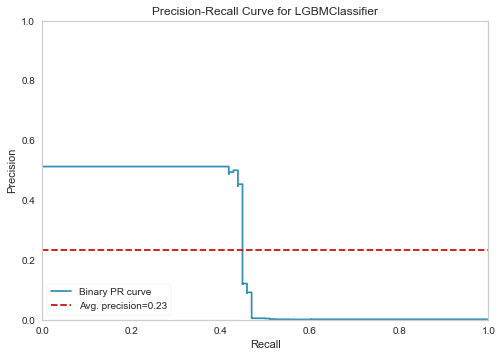

In [127]:
model = lgb.LGBMClassifier(random_state=42, max_depth=4, n_estimators = 100, learning_rate= 0.1, 
                      subsample = 0.5, colsample_bytree = 0.8)

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_resampled, y_resampled)
viz.score(X_test, y_test)
viz.show();

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [129]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

***ii. Define Model***

In [130]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(128, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(64, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))  

opt = Adam(lr = 0.02)

***iii. Compile Model***

In [131]:
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [132]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 10, restore_best_weights = True)

***iv. Fit Model***

In [133]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
3205/3205 [==============================] - 7s 2ms/step - loss: 0.0082 - recall: 0.2722 - val_loss: 0.0031 - val_recall: 0.8444
Epoch 2/1000
3205/3205 [==============================] - 6s 2ms/step - loss: 0.0062 - recall: 0.7278 - val_loss: 0.0026 - val_recall: 0.8444
Epoch 3/1000
3205/3205 [==============================] - 6s 2ms/step - loss: 0.0048 - recall: 0.7822 - val_loss: 0.0060 - val_recall: 0.8667
Epoch 4/1000
3205/3205 [==============================] - 6s 2ms/step - loss: 0.0046 - recall: 0.7851 - val_loss: 0.0026 - val_recall: 0.8667
Epoch 5/1000
3205/3205 [==============================] - 5s 2ms/step - loss: 0.0049 - recall: 0.7822 - val_loss: 0.0032 - val_recall: 0.8667
Epoch 6/1000
3205/3205 [==============================] - 5s 2ms/step - loss: 0.0041 - recall: 0.7765 - val_loss: 0.0036 - val_recall: 0.8444
Epoch 7/1000
3205/3205 [==============================] - 6s 2ms/step - loss: 0.0049 - recall: 0.7736 - val_loss: 0.0033 - val_recall: 0.8667
Epoch 

In [134]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3840      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 9)                 585       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 12,691
Trainable params: 12,691
Non-trainable params: 0
_________________________________________________________________


***v. Prediction and Model Evaluating***

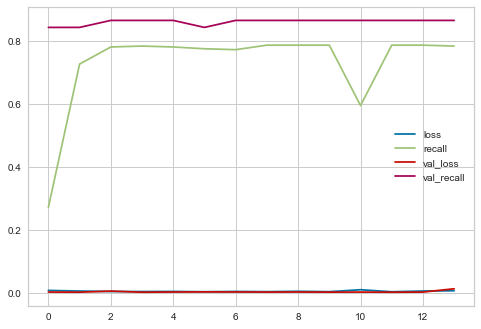

In [135]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [136]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.003980673383921385
recall :  0.8163265585899353


In [137]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1781/1781 [==============================] - 2s 831us/step
[[56842    22]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.82      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



1781/1781 [==============================] - 1s 783us/step


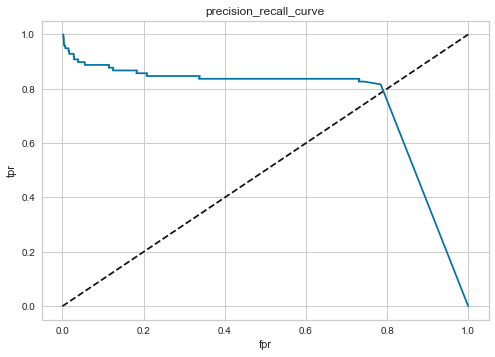

In [138]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('precision_recall_curve')
plt.show()

#### ANN with smoted data

In [139]:
model_smoted = Sequential()

model_smoted.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model_smoted.add(Dropout(0.5))
model_smoted.add(Dense(16, activation = "relu"))
model_smoted.add(Dropout(0.5))
model_smoted.add(Dense(4, activation = "relu"))
model_smoted.add(Dense(1, activation = "sigmoid"))  

opt = Adam(lr = 0.002)

In [140]:
model_smoted.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [141]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 10, restore_best_weights = True)

In [142]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify = y_resampled, random_state=42)

In [143]:
model_smoted.fit(x = X_train_ann, y = y_train_ann, validation_data = (X_test_ann, y_test_ann), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
4386/4386 [==============================] - 9s 2ms/step - loss: 0.0161 - recall: 0.1943 - val_loss: 0.0046 - val_recall: 0.3067
Epoch 2/1000
4386/4386 [==============================] - 8s 2ms/step - loss: 0.0077 - recall: 0.2829 - val_loss: 0.0042 - val_recall: 0.8133
Epoch 3/1000
4386/4386 [==============================] - 8s 2ms/step - loss: 0.0073 - recall: 0.5000 - val_loss: 0.0032 - val_recall: 0.8333
Epoch 4/1000
4386/4386 [==============================] - 8s 2ms/step - loss: 0.0064 - recall: 0.6743 - val_loss: 0.0035 - val_recall: 0.7933
Epoch 5/1000
4386/4386 [==============================] - 8s 2ms/step - loss: 0.0058 - recall: 0.7571 - val_loss: 0.0029 - val_recall: 0.8267
Epoch 6/1000
4386/4386 [==============================] - 8s 2ms/step - loss: 0.0057 - recall: 0.7657 - val_loss: 0.0034 - val_recall: 0.8400
Epoch 7/1000
4386/4386 [==============================] - 8s 2ms/step - loss: 0.0052 - recall: 0.7657 - val_loss: 0.0034 - val_recall: 0.8467
Epoch 

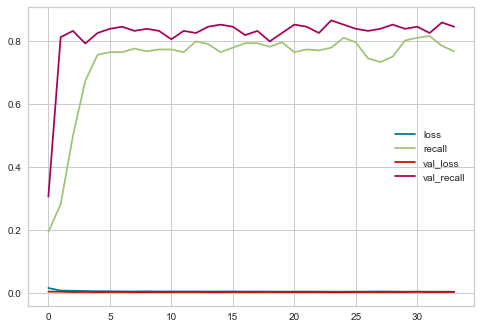

In [144]:
loss_df = pd.DataFrame(model_smoted.history.history)
loss_df.plot();

In [145]:
loss, recall = model_smoted.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.0030356445349752903
recall :  0.8469387888908386


In [146]:
y_pred = model_smoted.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1781/1781 [==============================] - 1s 812us/step
[[56841    23]
 [   15    83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.85      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



***vi. Plot Precision and Recall Curve***

1781/1781 [==============================] - 1s 730us/step


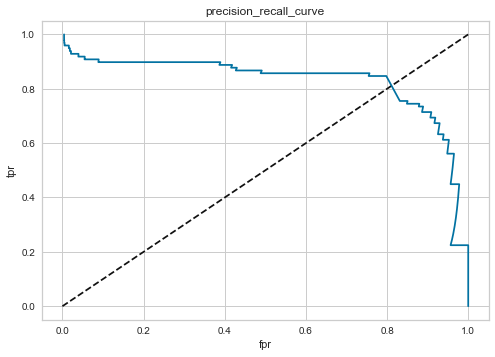

In [147]:
y_pred_proba = model_smoted.predict(X_test)
fpr, tpr, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('precision_recall_curve')
plt.show()

##  SHAP (SHapley Additive exPlanation)

In [148]:
#!pip install shap

 99%|===================| 56389/56962 [01:22<00:00]        

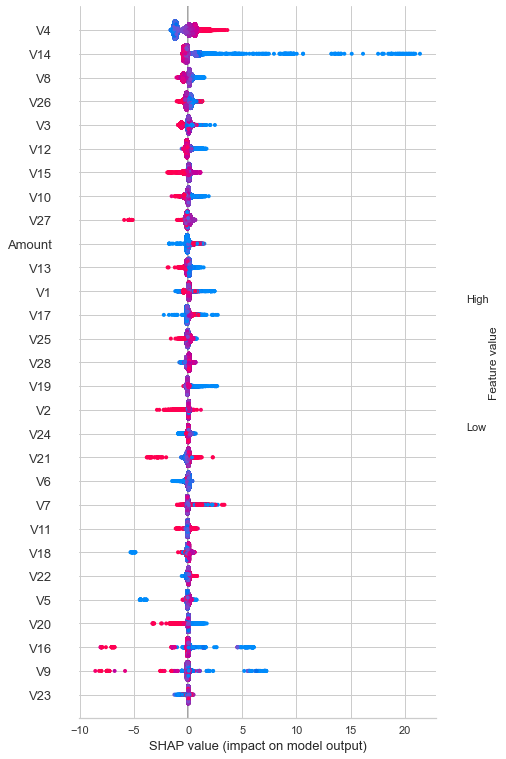

In [149]:
import shap

explainer = shap.Explainer(clf2, X_resampled)

shap_values = explainer.shap_values(X_test)   

shap.summary_plot(shap_values, X_test, max_display=300, feature_names = X.columns)

### Feature Selection

100%|===================| 200345/200500 [04:52<00:00]        

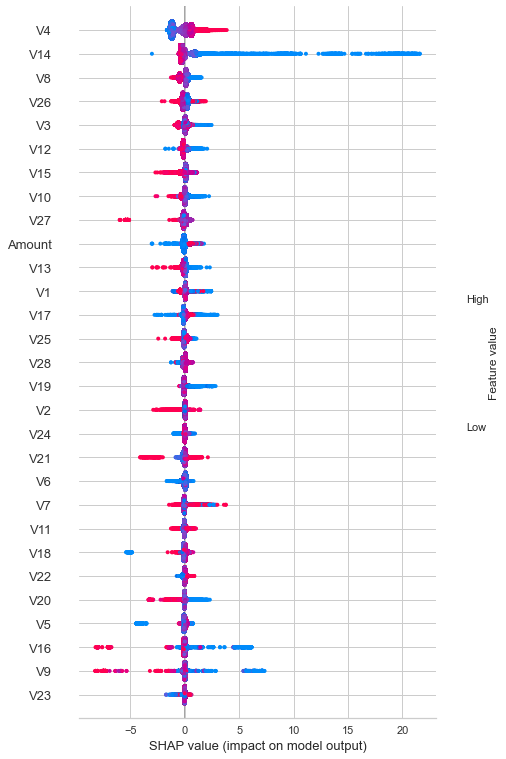

In [150]:
explainer = shap.Explainer(clf2, X_resampled)

shap_values = explainer.shap_values(X_resampled)

shap.summary_plot(shap_values, X_resampled, max_display=300,feature_names = X.columns)

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Model as .pkl


In [151]:
import pickle

In [152]:
pickle.dump(log_model, open('logisticreg.pkl', 'wb'))                     # log_model with best trashhold value

In [153]:
pickle.dump(rf_grid_model, open('randomforest.pkl', 'wb'))

In [154]:
pickle.dump(clf2, open('lgbm.pkl', 'wb'))

In [155]:
model_smoted.save('model_ann.h5')

In [156]:
final_scaler = scaler

In [157]:
pickle.dump(final_scaler, open('scaler.pkl', 'wb'))

### Save and Export Variables as .pkl

https://meteaki-fraud-detection-fraud-axi4ye.streamlitapp.com/

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___